# Calculating descriptive Statistics

In [1]:
# mulai dengan mengimport package

import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
'''
mari buat beberapa data untuk di kerjakan. kita akan mulai dengan
list python yang berisi beberapa data numerik
'''
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [4]:
'''
sekarang buat objek np.array dan pd.series yang sesuai dengan x 
dan x_with_nan :
'''

y, y_with_nan = pd.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

<FloatingArray>
[8.0, 1.0, 2.5, 4.0, 28.0]
Length: 5, dtype: Float64
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


# Mean
## sample mean, juga di sebut dengan sample arithmetic mean atau average, adalah rata rata aritmatika dari semua item dalam kumpulan data

In [6]:
'''
kita dapat menghitung mean dengan pure python menggunakan sum()
dan len(), tanpa mengimpor pustaka lain
'''
mean_ = sum(x) / len(x)
mean_

8.7

In [7]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [9]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [14]:
mean_ = np.mean(y)
mean_

8.7

In [22]:
# mean = y.mean()
# mean

In [19]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


# Weighted Mean

In [25]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [26]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)
wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


In [27]:
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights=w)
print(wmean)
wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


In [28]:
(w * y).sum() / w.sum()

6.95

# Harmonic Mean

In [29]:
'''
secara teknis, pengertian dari harmonic mean adalah the reciprocal
of the average of the reciprocals reciprocal artinya adalah 1/value

'''

hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [30]:
'''
ini sangat berbeda dari nilai arithmetic mean untuk data yang sama
yaitu x, yang kita hitung menadi 8.7

kita juga dapat menghitung ukuran ini dengan statistics.harmonic
'''
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [31]:
scipy.stats.hmean(y)

2.7613412228796843

In [32]:
scipy.stats.hmean(z)

2.7613412228796843

# Geometric Mean

In [33]:
# geometric mean adalah akar ke n dari hasil kali semua n elemen x

gmean = 1
for item in x :
   gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

In [34]:
scipy.stats.gmean(y)

4.67788567485604

In [35]:
scipy.stats.gmean(z)

4.67788567485604

# Median

In [36]:
n = len(x)
if n % 2 :
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

In [37]:
statistics.median_low(x[:-1])

2.5

In [38]:
statistics.median_high(x[:-1])

4

In [39]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


In [40]:
median_ = np.median(y)
print(median_)

4.0


In [41]:
median_ = np.median(y[:-1])
print(median_)

3.25


# Mode

In [42]:
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [43]:
mode_ = statistics.mode(u)
mode_

2

In [44]:
u, v = np.array(u), np.array(v)
mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [45]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [46]:
print(mode_.mode)
print(mode_.count)

[12]
[3]


In [47]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
print(u.mode())
print(v.mode())
print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


# Measures of variability

## measures of central tendency tidak cukup untuk menggambarkan data. kita juga memerlukan ukuran variabilitas yang mengukur penyebaran titik data. di bagian ini kita akan mempelaari cara mengidintifikasi dan menghitung variabel

In [48]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [49]:
var_ = statistics.variance(x)
var_

123.2

In [50]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [51]:
z.var(ddof=1)

123.19999999999999

# Standard deviation
## sample standard deviation adalh cara lain untuk mengukur penyebaran data. yang berhubungan dengan varian sample


In [52]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [53]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [54]:
np.std(y,ddof=1)

11.099549540409285

In [55]:
y.std(ddof=1)

11.099549540409285

In [56]:
z.std(ddof=1)

11.099549540409285

# Skewness
## sample skewness mengukur asimetri sample data. ada beberapa definisi matematis tentang skewness. satu ekspresi umum untuk menghitung skewness kumpulan data x dengan elemen n 


In [57]:
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_) ** 2 for item in x) / (n - 1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)** 3 for item in x)* n / ((n - 1) * (n -2)* std_**3))

In [58]:
skew_

1.9470432273905929

In [59]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias=False)

1.9470432273905927

In [60]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [61]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

1.9470432273905924

In [62]:
z_with_nan.skew()

1.9470432273905924

# precentiles


In [64]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=2)
[8.0]
statistics.quantiles(x, n=4, method='inclusive')
[0.1, 8.0, 21.0]

[0.1, 8.0, 21.0]

In [66]:
>>> y = np.array(x)
>>> np.percentile(y, 5)
-3.44
>>> np.percentile(y, 95)
34.919999999999995

34.919999999999995

In [67]:
np.percentile(y, [25, 50, 75])
np.median(y)

8.0

In [68]:
y_with_nan = np.insert(y, 2, np.nan)
print(y_with_nan)
np.nanpercentile(y_with_nan, [25, 50, 75])

[-5.  -1.1  nan  0.1  2.   8.  12.8 21.  25.8 41. ]


array([ 0.1,  8. , 21. ])

In [69]:
np.quantile(y, 0.05)
#-3.44
np.quantile(y, 0.95)
#34.919999999999995
np.quantile(y, [0.25, 0.5, 0.75])
#array([ 0.1, 8. , 21. ])
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])
#array ([ 0.1, 8. , 21. ])

array([ 0.1,  8. , 21. ])

In [70]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)
#-3.44
z.quantile(0.95)
#34.919999999999995
z.quantile([0.25, 0.5, 0.75])
# 0.25 0.1
# 0.50 8.0
# 0.75 21.0
#dtype: float64
z_with_nan.quantile([0.25, 0.5, 0.75])
# 0.25 0.1
# 0.50 8.0
# 0.75 21.0
#dtype: float64

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

# Rangers
## rentang data / range data adalah perbedaan antara elemen maksimum dan minimum dalam kumpulan data. kita bisa mendapatkannya dengan fungsi np.ptp():

In [72]:
>>> np.ptp(y)
# 46.0
>>> np.ptp(z)
# 46.0
>>> np.ptp(y_with_nan)
# nan
>>> np.ptp(z_with_nan)
# 46.0

nan

In [73]:
np. amax(y) - np.amin(y)
#46.0
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)
#46.0
y.max() - y.min()
#46.0
z.max() - z.min()
#46.0
z_with_nan.max() - z_with_nan.min()
#46.0

46.0

In [74]:
quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]
#20.9
quartiles = z.quantile([0.25, 0.75])
quartiles [0.75] - quartiles[0.25]
#20.9

20.9

# Summary of descriptive statistics
## scipy dan pandas menawarkan function yang berguna untuk mendapatkan descriptive statistics dengan cepat dengan satu panggilan fungsi atau method

In [75]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result
# Describeresult(nobs9, minmax=(-5.0, 41.0), mean=11.622222222222222,
# variance=228.75194444444446, skewness=0.9249043136685094,
# kurtosis=0.14770623629658886)

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [76]:
result.nobs
#9.
result.minmax[0] # Min
#-5.0
result.minmax[1] # Max
#41.0
result.mean
#11.622222222222222
result.variance
#228.75194444444446
result.skewness
#0.9249043136685094
result.kurtosis
#0.14770623629658886

0.14770623629658886

In [77]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [78]:
result['mean']
#11.622222222222222
result['std']
#15.12454774346805
result['min']
#-5.0
result['max']
#41.0
result['25%']
#0.1
result['50%']
#8.0
result['75%']
#21.0

21.0

# Measures of Correlation Between pairs of data

In [79]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

# Covariance

In [80]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n))/ (n - 1))
cov_xy

19.95

In [81]:
'''
pertama kita harus mencari nilai mean dari x dan y, kemudian kita
menerapkan rumus matematika untuk cariance

numpy memiliki fungsi cov() yang mengembalikan covariance matrix :
'''

cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [82]:
x_.var(ddof = 1)

38.5

In [83]:
y_.var(ddof = 1)

13.914285714285711

In [84]:
# Dua elemen lain dari covariance matrix adalah sama 
# dan mewakili covariance aktual antara x dan y:

cov_xy = cov_matrix[0, 1]
cov_xy

19.950000000000003

In [85]:
cov_xy = cov_matrix[1, 0]
cov_xy

19.950000000000003

In [86]:
cov_xy = x__.cov(y__)
cov_xy

19.950000000000003

In [87]:
# Coreelation Coefficient
# maka kita dapat menghitung correlation coefficient dengan Python pure:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.8619500056316062

In [88]:
r, p = scipy.stats.pearsonr(x_, y_)
r

0.8619500056316058

In [89]:
p

5.122760847201207e-07

In [90]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [91]:
r = corr_matrix[0, 1]
r
#0.8619500056316061
r = corr_matrix[1, 0] 
r
#0.861950005631606

0.8619500056316061

In [92]:
>>> scipy.stats.linregress (x_, y_)
# LinregressResult(slope=0.5181818181818181, intercept3D5.714285714285714,
# rvalue=0.861950005631606, pvalue=5.122760847201164e-07,
# stderr=0.06992387660074979)

LinregressResult(slope=0.5181818181818182, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [93]:
result = scipy.stats.linregress (x_, y_) 
r = result.rvalue 
r

0.861950005631606

# Working with 2D Data
## statisticians sering bekerja dengan data 2D

In [94]:
a = np.array([[1, 1, 1],
              [2, 3, 1],
              [4, 9, 2],
              [8, 27, 4],
              [16, 1, 1]])
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [95]:
'''
sekarang kita memiliki kumpulan data 2D yang akan kita gunakan di
section ini
'''

np.mean(a)

a.mean()

np.median(a)

a.var(ddof = 1)

53.40000000000001

In [96]:
np.mean(a, axis = 0)

a.mean(axis = 0)

array([6.2, 8.2, 1.8])

In [97]:
np.median(a, axis=0)
#array ([4., 3., 1.])
np.median(a, axis=1)
#array([1., 2., 4., 8., 1.])
a.var(axis=0, ddof=1)
#array([ 37.2, 121.2, 1.7])
a.var(axis=1, ddof=1)
#array ([ 0., 1., 13., 151., 75.])

array([  0.,   1.,  13., 151.,  75.])

In [98]:
>>> scipy.stats.gmean (a) # Default: axis=0
#array([4. , 3.73719282, 1.51571657])
>>> scipy.stats.gmean(a, axis=0)
#array ([4. , 3.73719282, 1.51571657])
                    
                     

array([4.        , 3.73719282, 1.51571657])

In [99]:
>>> scipy.stats.gmean(a, axis=1)
>>> scipy.stats.gmean (a, axis=None)

2.829705017016332

In [100]:
>>> scipy.stats.describe (a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [101]:
>>> scipy.stats.describe (a, ddof=1, bias=False) # Default: axis=0

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [102]:
>>> scipy.stats.describe (a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

In [103]:
>>> result = scipy.stats. describe (a, axis=1, ddof=1, bias=False)
>>> result.mean

array([ 1.,  2.,  5., 13.,  6.])

# Data Frames

In [110]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index = row_names, columns = col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [111]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [112]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [113]:
df.mean(axis = 1 )

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [114]:
df.var(axis = 1 )

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

In [115]:
df['A'].mean()

6.2

In [116]:
df['A'].var()

37.20000000000001

In [117]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [118]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [119]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [120]:
df.describe().at['mean', 'A']

df.describe().at['50%', 'B']


3.0

# Visualizing Data

In [121]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Boxplot

In [122]:
>>> np.random.seed (seed=0)
>>> x = np.random.randn(1000)
>>> y = np.random.randn(100)
>>> z = np.random.randn(10)

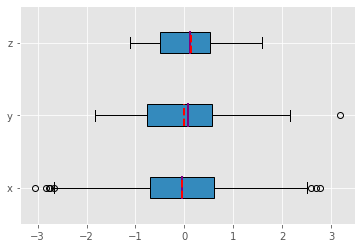

In [124]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z),
           vert=False,
           showmeans=True,
           meanline=True,
           labels=('x', 'y', 'z'),
           patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

# Histogram

In [125]:
hist, bin_edges = np.histogram(x, bins=10)
hist
bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

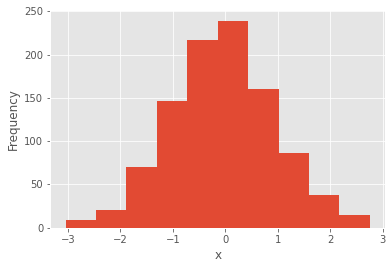

In [126]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

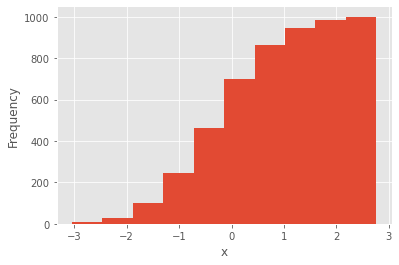

In [127]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

# Pie Chart

In [129]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)



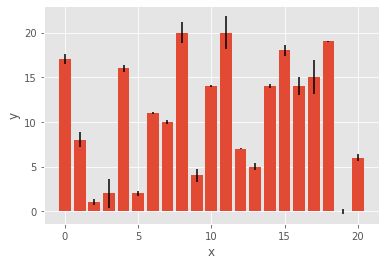

In [130]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

# X- Y PLOTS

In [131]:

x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

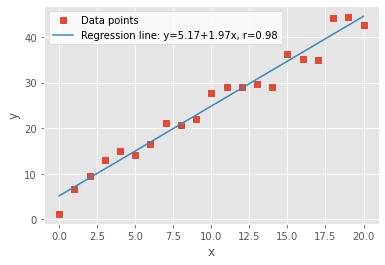

In [132]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

# Heatmaps

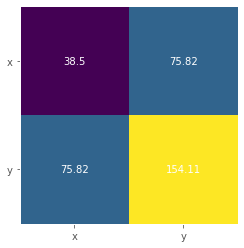

In [133]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):    
    for j in range(2):        
        ax.text(j, i, matrix[i, j], 
        ha='center', va='center', color='w')
plt.show()

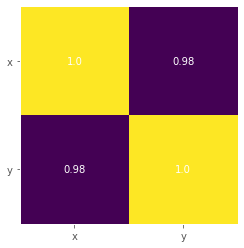

In [134]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):    
    for j in range(2):       
        ax.text(j, i, matrix[i, j], 
        ha='center', va='center', color='w')
plt.show()